# Machine Learning Operations - Preprocessing

This notebook was developed by:

- Bruna Simões (20240491)
- Daniel Caridade (20211588)
- Leonardo Di Caterina (20240485)
- Marco Galão (r20201545)

# 1. Libraries Importation

__`Step 1`__ Import the necessary libraries.

In [ ]:
from fraud_project.utils import *

In [11]:
# Helper function from the GitHub repository
# Path of project root
project_root = Path().resolve().parents[1]

# Add the project root directory to Python's module search path
sys.path.append(str(project_root))

# 2. Data Integration 

__`Step 2`__ Importing the dataset into the notebook, ignoring the first columns as it does not contain relevant information.

In [12]:
# Load dataset
data = pd.read_csv('../data/01_raw/data_v1.csv')
data

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-05-04 11:57:04,4586260469584,fraud_Kerluke Inc,misc_net,5.96,Melody,Thompson,F,0362 Anderson Wall,Mound City,...,-95.2138,1631,Architect,1953-01-20,3d21bce7967838c3988cfe0f7fca878a,1336132624,41.024651,-94.428240,0,50842.0
1,2019-12-14 08:55:21,4900628639996,fraud_Rempel PLC,grocery_net,70.66,Michael,Johnson,M,094 Owens Underpass,Norwalk,...,-118.0818,105549,Firefighter,1973-09-22,fda7712b4bbcaab36afded37ab55047f,1355475321,33.808771,-118.031888,0,90630.0
2,2019-03-30 05:21:33,676118385837,fraud_Rodriguez Group,gas_transport,50.92,Katelyn,Wise,F,674 Maureen Summit Apt. 276,Scotts Mills,...,-122.6187,1252,"Engineer, petroleum",1937-02-06,59161e0002642934974c1ae98bfa1f55,1333084893,44.561034,-123.281803,0,97331.0
3,2019-09-19 07:09:46,3596357274378601,fraud_Doyle Ltd,grocery_pos,71.68,David,Everett,M,4138 David Fall,Morrisdale,...,-78.2357,3688,Advice worker,1973-05-27,f487a7098c0bd4d45f710be1745c4acb,1348038586,41.612825,-78.316893,0,15834.0
4,2019-02-04 20:37:44,6011542681743618,fraud_Leffler-Goldner,personal_care,29.17,Emily,Hall,F,8851 Reese Neck,Basye,...,-78.7776,863,"Engineer, mining",1972-08-09,c2ed76f03cce8a6b362729a5a23f01c2,1328387864,39.387521,-79.674956,0,26444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90762,2019-05-03 01:50:55,4861310130652566408,fraud_Thiel PLC,misc_pos,410.37,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,-90.8435,10076,"Surveyor, rural practice",1977-12-16,14b94dc8026970fae77db1deb747f35f,1336009855,30.152101,-90.420021,0,70068.0
90763,2020-03-26 22:03:48,4560004149983868183,"fraud_Kihn, Brakus and Goyette",personal_care,38.94,Stacy,Villegas,F,20581 Pena Walks,Colorado Springs,...,-104.6556,525713,Museum/gallery exhibitions officer,1992-05-09,f93f924d08a19064ec37de7a69cf8e4b,1364335428,38.648246,-104.969889,0,80926.0
90764,2019-02-16 14:20:54,378904938837132,fraud_Gerhold LLC,home,29.43,Tina,Zimmerman,F,3595 Susan Island Suite 063,Thomas,...,-98.7388,1675,Barrister,1986-05-01,12177fa4ce00fc361366c28e0af96b81,1329402054,35.110496,-98.246154,0,73005.0
90765,2019-06-24 14:53:14,4155021259183870,fraud_Stark-Batz,entertainment,3.49,Renee,Parrish,F,174 Jennifer Meadow Apt. 467,Mountain Park,...,-98.9591,540,Research scientist (life sciences),1983-10-12,4a248f9b8268ba53241625b4af2a271c,1340549594,35.135938,-98.112255,0,73092.0


## 2.1. Data Description

The dataset contains obversations regarding the occurence of fraud in a certain transaction and contains the following features:

- `trans_date_trans_time`: Timestamp of the transaction.
- `cc_num`: Credit card number (hashed or anonymized).
- `merchant`: Merchant or store where the transaction occurred.
- `category`: Merchant or store where the transaction occurred.
- `amt`: Amount of the transaction.
- `first`: First name of the cardholder.
- `last`: Last name of the cardholder.
- `gender`: Gender of the cardholder.
- `street`: Name of the street where the cardholder resids.
- `city`: Name of the city where the cardholder resids.
- `state`: Name of the state where the cardholder resids.
- `zip`: Zip code of the residence of the cardholder.
- `lat`: Latitude coordinate of the transaction.
- `long`: Longitude coordinate of the transaction.
- `city_pop`: Population of the city where the transaction occurred.
- `job`: Occupation of the cardholder.
- `dob`: Date of birth of the cardholder.
- `trans_num`: Unique transaction number.
- `unix_time`: Unix timestamp of the transaction.
- `merch_lat`: Latitude coordinate of the merchant.
- `merch_long`: Longitude coordinate of the merchant.
- `is_fraud`: Indicator of whether the transaction is fraudulent (target feature).
- `merch_zipcode`: Zip code of the merchant.


In [13]:
numerical_features = ['trans_date_trans_time', 'amt', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long']

categorical_features = ['merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'job', 'unix_time', 
                        'merch_zipcode']

id_features = ['cc_num', 'trans_num']

target_feature = 'is_fraud'

categorical_features_high_cardinality = ['merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'job', 'unix_time', 'merch_zipcode']

categorical_features_low_cardinality = ['category', 'gender']

In [14]:
listed_columns = (
    numerical_features
    + categorical_features
    + id_features
    + [target_feature])

all_dataset_columns = data.columns.tolist()

missing_in_list = set(all_dataset_columns) - set(listed_columns)
extra_in_list = set(listed_columns) - set(all_dataset_columns)

print("Missing in your list:", missing_in_list)
print("Extra in your list:", extra_in_list)

Missing in your list: set()
Extra in your list: set()


In [15]:
data.shape

(90767, 23)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90767 entries, 0 to 90766
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  90767 non-null  object 
 1   cc_num                 90767 non-null  int64  
 2   merchant               90767 non-null  object 
 3   category               90767 non-null  object 
 4   amt                    90767 non-null  float64
 5   first                  90767 non-null  object 
 6   last                   90767 non-null  object 
 7   gender                 90767 non-null  object 
 8   street                 90767 non-null  object 
 9   city                   90767 non-null  object 
 10  state                  90767 non-null  object 
 11  zip                    90767 non-null  int64  
 12  lat                    90767 non-null  float64
 13  long                   90767 non-null  float64
 14  city_pop               90767 non-null  int64  
 15  jo

# 3. Data split

In [17]:
X = data.drop(columns=[target_feature])
y = data[target_feature]

# test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# train (60%) and val (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)

print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (54459, 22)
Validation set size: (18154, 22)
Test set size: (18154, 22)


# 4. Preprocessing

## 3.1 Data Types Treatment

__`Step 1`__ Convert trans_date_trans_time and dob to date_time

In [ ]:
def convert_datetime(dataset, col):
    print(f"Before conversion {col}:")
    print(dataset[col].dtypes)

    for col in col:
        dataset[col] = pd.to_datetime(dataset[col], errors='coerce')

    print("\nAfter conversion:")
    print(dataset[col].dtypes)

    return dataset

In [84]:
print("Before conversion:")
print(data[['trans_date_trans_time', 'dob']].dtypes)

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'], errors='coerce')
data['dob'] = pd.to_datetime(data['dob'], errors='coerce')

print("After conversion:")
print(data[['trans_date_trans_time', 'dob']].dtypes)

Before conversion:
trans_date_trans_time    object
dob                      object
dtype: object
After conversion:
trans_date_trans_time    datetime64[ns]
dob                      datetime64[ns]
dtype: object


In [ ]:
convert_datetime(X_train, 'trans_date_trans_time')
convert_datetime(X_val, 'trans_date_trans_time')

__`Step 2`__ Convert ZIPs to categorical strings

In [85]:
data['zip'] = data['zip'].astype(str)

## 3.2 Incoherence treatment

__`Step 1`__ Dropping columns

In [86]:
cols_to_drop = ['first', 'merchant']

print("Dropping columns due to perfect association:", cols_to_drop)
data.drop(columns=cols_to_drop, inplace=True)

categorical_features = [col for col in categorical_features if col not in cols_to_drop]
categorical_features_high_cardinality = [col for col in categorical_features_high_cardinality if col not in cols_to_drop]

Dropping columns due to perfect association: ['first', 'merchant']


We drop `first` because it is perfectly associated with `gender`, so it adds no new information and increases complexity.  
We drop `merchant` because it is almost identical to `category`, which is simpler and easier to encode.

## 3.3 Missing Values Treatment

In [87]:
print("Missing values before treatment:")
print(data.isna().sum()[data.isna().sum() > 0])

Missing values before treatment:
merch_zipcode    13714
dtype: int64


__`Step 1`__ Fill missing merchant ZIPs using most common ZIP per merchant coordinates

In [88]:
# Fill with most frequent zip in the same city
city_zip_lookup = (
    data[~data['merch_zipcode'].isna()]
    .groupby('city')['merch_zipcode']
    .agg(lambda x: x.mode().iloc[0])
    .to_dict())

mask = data['merch_zipcode'].isna() & data['city'].notna()
data.loc[mask, 'merch_zipcode'] = data.loc[mask, 'city'].map(city_zip_lookup)

print("Missing merchant zips after imputation:", data['merch_zipcode'].isna().sum())

Missing merchant zips after imputation: 153


In [89]:
# Fill remaining zips using the most common zip in the same state
state_zip_map = (
    data[~data['merch_zipcode'].isna()]
    .groupby('state')['merch_zipcode']
    .agg(lambda x: x.mode().iloc[0])
    .to_dict()
)

mask = data['merch_zipcode'].isna() & data['state'].notna()
data.loc[mask, 'merch_zipcode'] = data.loc[mask, 'state'].map(state_zip_map)

print("Missing merchant zips after imputation:", data['merch_zipcode'].isna().sum())

Missing merchant zips after imputation: 150


To handle missing values in the `merch_zipcode` feature, we applied a two-stage imputation strategy using geographic hierarchy:

1. **Using city**  
   We first filled missing zip codes by assigning the most frequent zip within the same `city`, reducing the number of missing ZIPs to **153**.

2. **Using state**  
   For the remaining missing values, we used the most common zip within the same `state`, further reducing the number of missing zips to **150**.

We chose not to impute the remaining 150 values to avoid introducing noise or artificial bias. Instead, we retain a binary flag (`zip_missing`) to indicate which rows still have missing zip codes.


__`Step 2`__ Flag missing merchant ZIPs

In [90]:
data['zip_missing'] = data['merch_zipcode'].isna().astype(int)

print(f"Missing merchant ZIPs flagged: {data['zip_missing'].sum()} rows")

Missing merchant ZIPs flagged: 150 rows


## 3.4 Feature Engineering

__`Step 1`__ Create distance between user and merchant

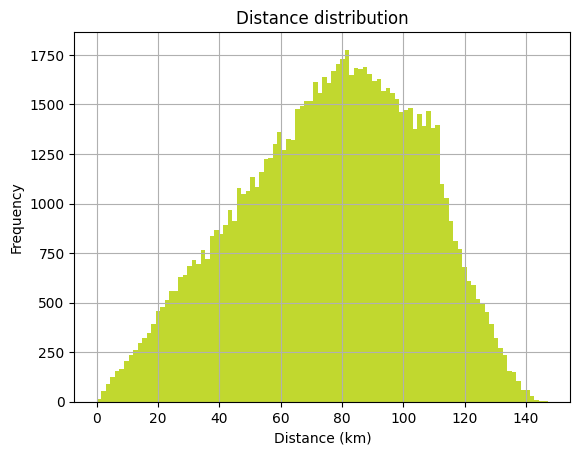

In [91]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1_rad, lon1_rad = np.radians(lat1), np.radians(lon1)
    lat2_rad, lon2_rad = np.radians(lat2), np.radians(lon2)
    
    dlat, dlon = lat2_rad - lat1_rad, lon2_rad - lon1_rad
    
    a = np.sin(dlat/2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c

# Create the distance feature
data['distance'] = haversine_vectorized(data['lat'], data['long'], data['merch_lat'], data['merch_long'])
numerical_features += ['distance']

# Visualize
data['distance'].hist(bins=100, color='#C1D82F')
plt.title("Distance distribution")
plt.xlabel("Distance (km)")
plt.ylabel("Frequency")
plt.show()

__`Step 2`__ Extract date and time features from trans_date_trans_time

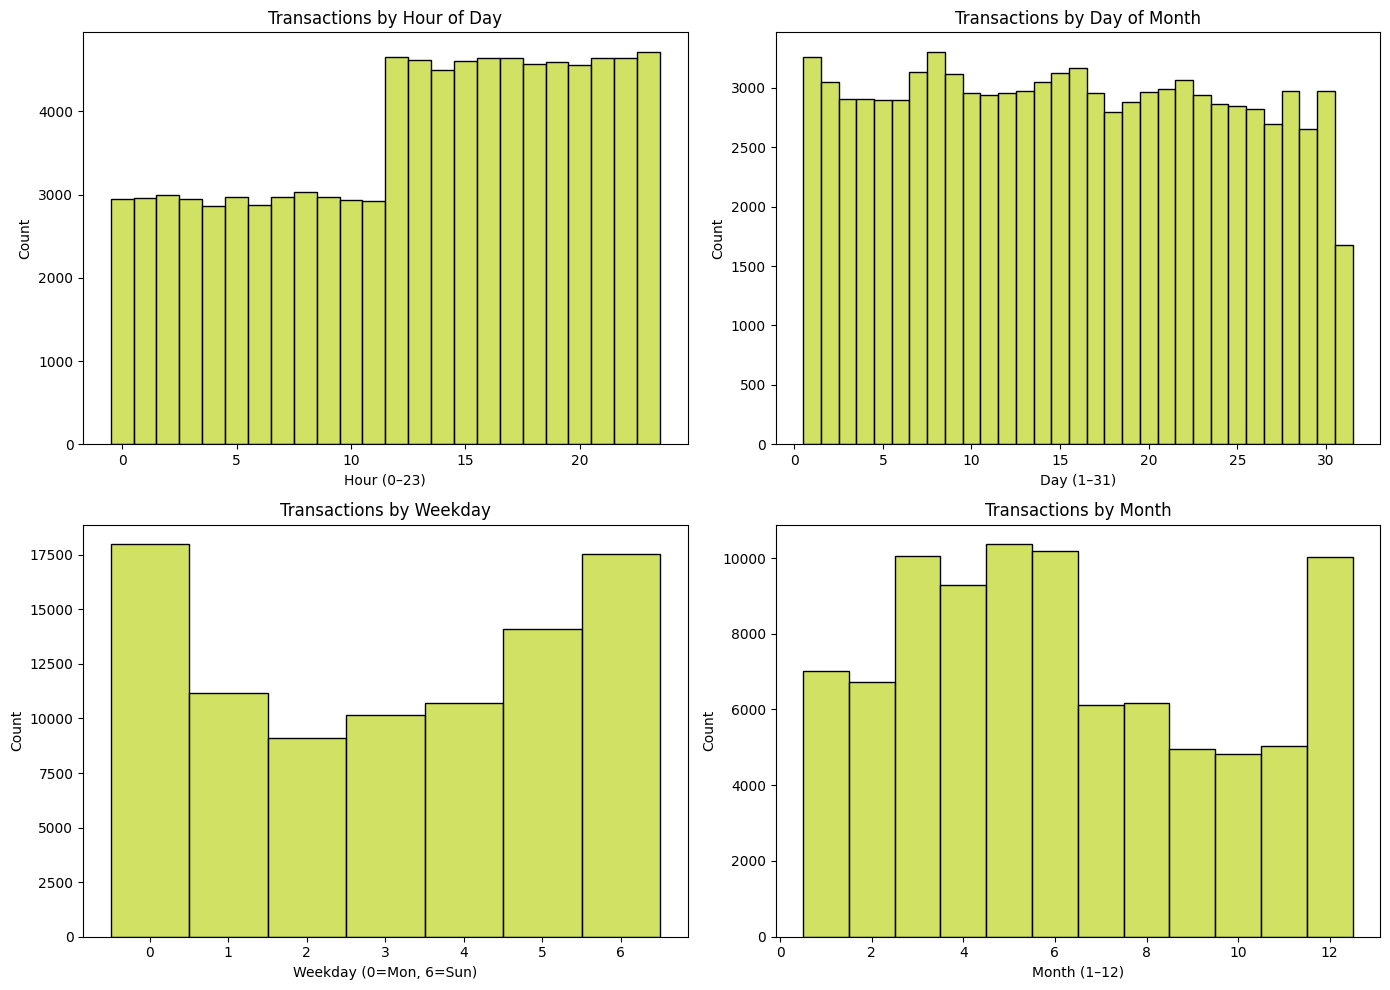

In [92]:
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day'] = data['trans_date_trans_time'].dt.day
data['weekday'] = data['trans_date_trans_time'].dt.weekday  # Monday = 0
data['month'] = data['trans_date_trans_time'].dt.month

categorical_features += ['hour', 'day', 'weekday', 'month']
categorical_features_temporal = ['hour', 'day', 'weekday', 'month']
numerical_features = [col for col in numerical_features if col not in ['trans_date_trans_time']]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(data['hour'], bins=24, ax=axs[0, 0], color='#C1D82F', discrete=True)
axs[0, 0].set_title('Transactions by Hour of Day')
axs[0, 0].set_xlabel('Hour (0–23)')
axs[0, 0].set_ylabel('Count')

sns.histplot(data['day'], bins=31, ax=axs[0, 1], color='#C1D82F', discrete=True)
axs[0, 1].set_title('Transactions by Day of Month')
axs[0, 1].set_xlabel('Day (1–31)')
axs[0, 1].set_ylabel('Count')

sns.histplot(data['weekday'], bins=7, ax=axs[1, 0], color='#C1D82F', discrete=True)
axs[1, 0].set_title('Transactions by Weekday')
axs[1, 0].set_xlabel('Weekday (0=Mon, 6=Sun)')
axs[1, 0].set_ylabel('Count')

sns.histplot(data['month'], bins=12, ax=axs[1, 1], color='#C1D82F', discrete=True)
axs[1, 1].set_title('Transactions by Month')
axs[1, 1].set_xlabel('Month (1–12)')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

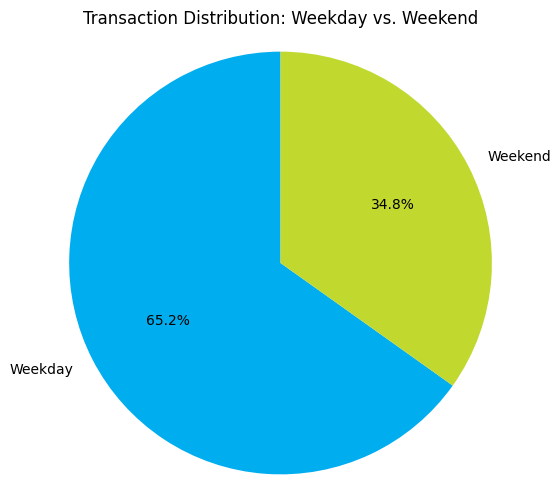

In [93]:
# Transaction made on weekend
data['is_weekend'] = data['weekday'].isin([5, 6]).astype(int)

categorical_features += ['is_weekend']

weekend_counts = data['is_weekend'].value_counts().sort_index()
labels = ['Weekday', 'Weekend']
colors = ['#00ADEF', '#C1D82F'] 

plt.figure(figsize=(6, 6))
plt.pie(weekend_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Transaction Distribution: Weekday vs. Weekend')
plt.axis('equal') 
plt.show()


__`Step 3`__ Create customer's age

In [ ]:
data['age'] = data['trans_date_trans_time'].dt.year - data['dob'].dt.year

numerical_features += ['age']
numerical_features = [col for col in numerical_features if col not in ['dob']]

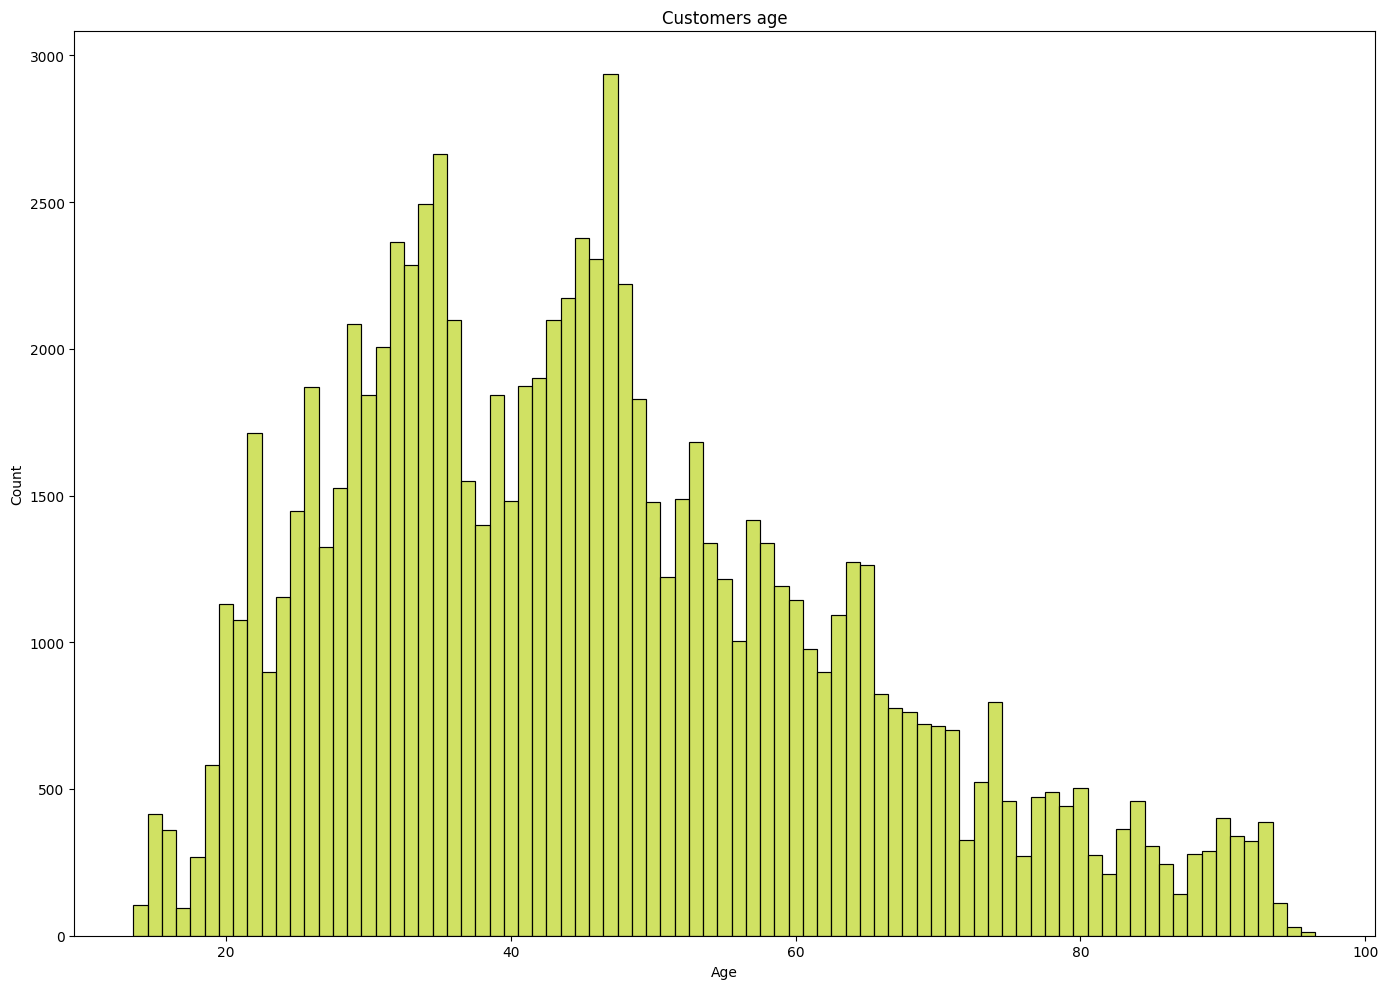

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(14, 10))

sns.histplot(data['age'], bins=24, ax=ax, color='#C1D82F', discrete=True)
ax.set_title('Customers age')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

__`Step 4`__ Log-transform skewed features

In [96]:
# Features to log-transform
log_transform_features = ['amt', 'city_pop'] 

# log(1 + x) transform to avoid log(0)
for col in log_transform_features:
    data[f'log_{col}'] = np.log1p(data[col])
    numerical_features += [f'log_{col}']

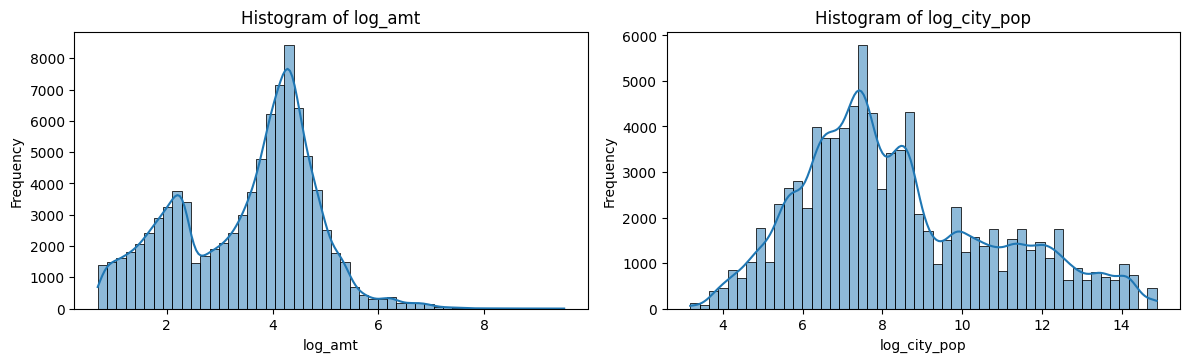

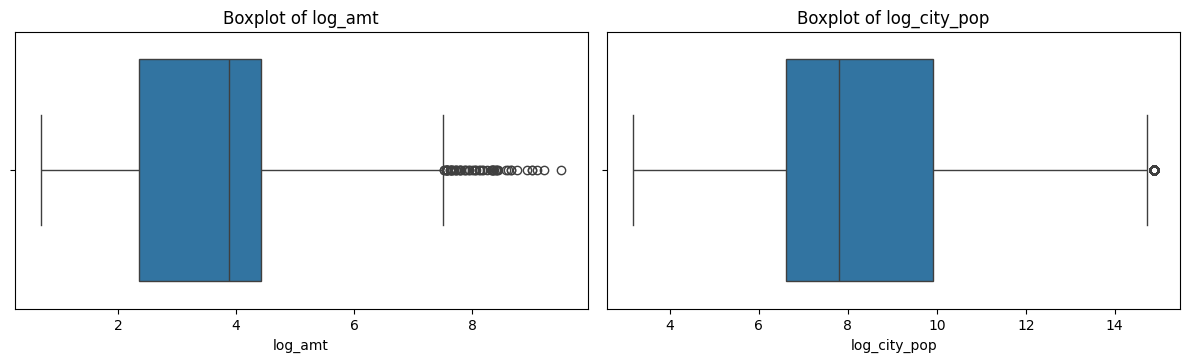

In [97]:
plot_log_features = [f'log_{col}' for col in log_transform_features]

n_rows, n_cols = 3, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(plot_log_features):
    sns.histplot(data[col], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(len(plot_log_features), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(plot_log_features):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

for j in range(len(plot_log_features), n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


__`Step 5`__ Create amount per km

In [98]:
data['amt_per_km'] = data['amt'] / (data['distance'] + 0.01)  # to avoid division by zero
numerical_features += ['amt_per_km']

__`Step 6`__ Sparse category handling

In [99]:
threshold = 0.01 # threshold for rare categories

In [100]:
total_rows = len(data)

for col in categorical_features:
    value_counts = data[col].value_counts(normalize=True)
    
    num_unique = value_counts.shape[0]
    num_rare = (value_counts < threshold).sum()
    
    print(f"Feature: {col}")
    print(f"  Number of unique categories: {num_unique}")
    print(f"  Number of rare categories (less than 1%): {num_rare}")
    print("-" * 50)


Feature: category
  Number of unique categories: 14
  Number of rare categories (less than 1%): 0
--------------------------------------------------
Feature: last
  Number of unique categories: 474
  Number of rare categories (less than 1%): 467
--------------------------------------------------
Feature: gender
  Number of unique categories: 2
  Number of rare categories (less than 1%): 0
--------------------------------------------------
Feature: street
  Number of unique categories: 949
  Number of rare categories (less than 1%): 949
--------------------------------------------------
Feature: city
  Number of unique categories: 870
  Number of rare categories (less than 1%): 870
--------------------------------------------------
Feature: state
  Number of unique categories: 51
  Number of rare categories (less than 1%): 15
--------------------------------------------------
Feature: zip
  Number of unique categories: 938
  Number of rare categories (less than 1%): 938
----------------

In [101]:
def rare_label_encoder(col, threshold=0.01):
    freq = data[col].value_counts(normalize=True)
    rare = freq[freq < threshold].index
    data[col + '_grouped'] = data[col].apply(lambda x: 'Other' if x in rare else x)

rare_label_encoder('state')

categorical_features += ['state_grouped']
categorical_features_high_cardinality += ['state_grouped']

## 3.5 Outlier Treatment

In [102]:
# Calculate Q1, Q3, and IQR
q1 = data["amt"].quantile(0.25)
q3 = data["amt"].quantile(0.75)
iqr = q3 - q1
upper_iqr_limit = q3 + 1.5 * iqr

# Calculate 99th percentile
perc_99 = data["amt"].quantile(0.99)

# Maximum value
max_val = data["amt"].max()

# Print all values
print(f"  Q1 (25th percentile): {q1:.2f}")
print(f"  Q3 (75th percentile): {q3:.2f}")
print(f"  IQR (Q3 - Q1): {iqr:.2f}")
print(f"  Upper limit using IQR (Q3 + 1.5*IQR): {upper_iqr_limit:.2f}")
print(f"  99th percentile: {perc_99:.2f}")
print(f"  Max value: {max_val:.2f}")


  Q1 (25th percentile): 9.63
  Q3 (75th percentile): 82.59
  IQR (Q3 - Q1): 72.96
  Upper limit using IQR (Q3 + 1.5*IQR): 192.03
  99th percentile: 547.83
  Max value: 13536.84


The 99th percentile is almost 3x the IQR limit, and the max value is ~70x above Q3.

In [103]:
cap_val = data['amt'].quantile(0.99)
data['amt'] = np.minimum(data['amt'], cap_val)
data[f'log_amt'] = np.log1p(data['amt'])

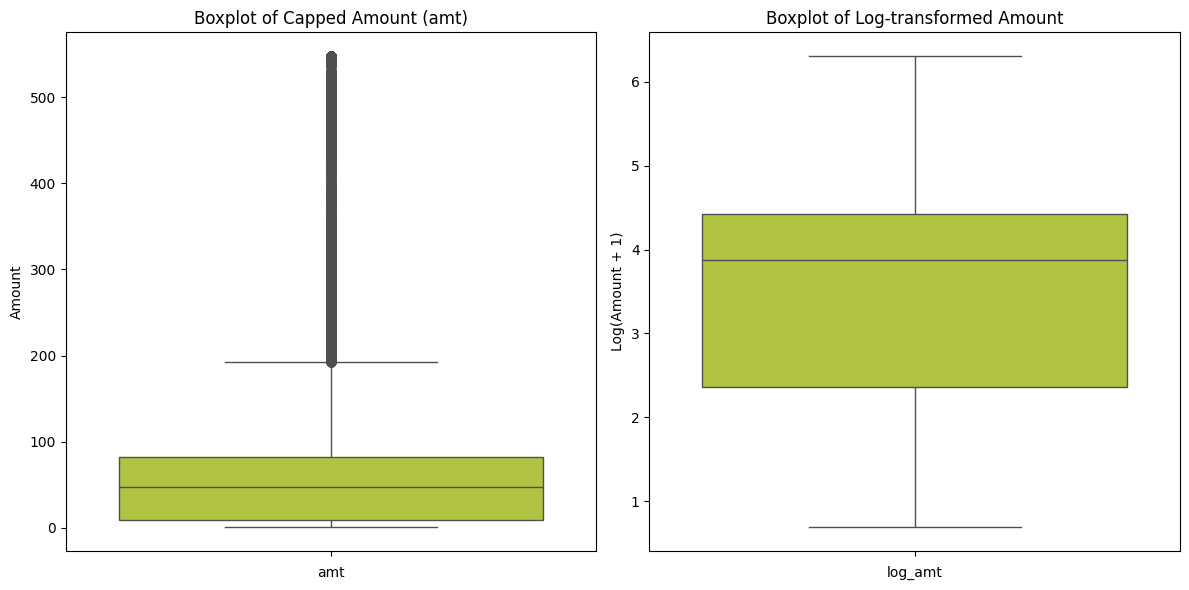

In [104]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(y=data['amt'], ax=axs[0], color='#C1D82F')
axs[0].set_title('Boxplot of Capped Amount (amt)')
axs[0].set_ylabel('Amount')
axs[0].set_xlabel('amt')

sns.boxplot(y=data['log_amt'], ax=axs[1], color='#C1D82F')
axs[1].set_title('Boxplot of Log-transformed Amount')
axs[1].set_ylabel('Log(Amount + 1)')
axs[1].set_xlabel('log_amt')

plt.tight_layout()
plt.show()

## 3.6 Encoding

__`Step 1`__ One hot encoding for low cardinality

In [107]:
data = pd.get_dummies(data, columns=categorical_features_low_cardinality, drop_first=True)
dummy_cols = [col for col in data.columns if col.startswith('category_') or col.startswith('gender_') or col.startswith('is_weekend_')]
data[dummy_cols] = data[dummy_cols].astype(int)

In [108]:
data.head()

,trans_date_trans_time,cc_num,amt,last,street,city,state,zip,lat,long,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-05-04 11:57:04,4586260469584,5.96,Thompson,0362 Anderson Wall,Mound City,MO,64470,40.1362,-95.2138,...,0,0,0,1,0,0,0,0,0,0
1,2019-12-14 08:55:21,4900628639996,70.66,Johnson,094 Owens Underpass,Norwalk,CA,90650,33.9056,-118.0818,...,0,0,0,0,0,0,0,0,0,1
2,2019-03-30 05:21:33,676118385837,50.92,Wise,674 Maureen Summit Apt. 276,Scotts Mills,OR,97375,44.9897,-122.6187,...,0,0,0,0,0,0,0,0,0,0
3,2019-09-19 07:09:46,3596357274378601,71.68,Everett,4138 David Fall,Morrisdale,PA,16858,41.0001,-78.2357,...,0,0,0,0,0,0,0,0,0,1
4,2019-02-04 20:37:44,6011542681743618,29.17,Hall,8851 Reese Neck,Basye,VA,22810,38.8089,-78.7776,...,0,0,0,0,0,1,0,0,0,0


__`Step 2`__ Frequency encoding for high cardinality

In [109]:
for col in categorical_features_high_cardinality:
    freq = data[col].value_counts(normalize=True)
    data[col + '_freq'] = data[col].map(freq)

In [110]:
data.head()

,trans_date_trans_time,cc_num,amt,last,street,city,state,zip,lat,long,...,gender_M,last_freq,street_freq,city_freq,state_freq,zip_freq,job_freq,unix_time_freq,merch_zipcode_freq,state_grouped_freq
0,2019-05-04 11:57:04,4586260469584,5.96,Thompson,0362 Anderson Wall,Mound City,MO,64470,40.1362,-95.2138,...,0,0.004539,0.001708,0.001708,0.029052,0.001708,0.001730,0.000011,0.000022,0.029052
1,2019-12-14 08:55:21,4900628639996,70.66,Johnson,094 Owens Underpass,Norwalk,CA,90650,33.9056,-118.0818,...,1,0.015512,0.002060,0.002523,0.043639,0.002060,0.004605,0.000011,0.000011,0.043639
2,2019-03-30 05:21:33,676118385837,50.92,Wise,674 Maureen Summit Apt. 276,Scotts Mills,OR,97375,44.9897,-122.6187,...,0,0.000617,0.000617,0.000617,0.014388,0.000617,0.001895,0.000011,0.000044,0.014388
3,2019-09-19 07:09:46,3596357274378601,71.68,Everett,4138 David Fall,Morrisdale,PA,16858,41.0001,-78.2357,...,1,0.001553,0.001553,0.002336,0.062721,0.002336,0.002005,0.000011,0.000188,0.062721
4,2019-02-04 20:37:44,6011542681743618,29.17,Hall,8851 Reese Neck,Basye,VA,22810,38.8089,-78.7776,...,0,0.003151,0.001708,0.001708,0.022662,0.001708,0.003063,0.000011,0.000066,0.022662


__`Step 3`__ Cyclic Encoding for time features

In [111]:
data['hour_sin'] = np.sin(2 * np.pi * data['hour'] / 24)
data['hour_cos'] = np.cos(2 * np.pi * data['hour'] / 24)

data['weekday_sin'] = np.sin(2 * np.pi * data['weekday'] / 7)
data['weekday_cos'] = np.cos(2 * np.pi * data['weekday'] / 7)

data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)

data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)

## 3.7 Scaling

In [117]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])